In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\RAMYA\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\RAMYA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\RAMYA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [40]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [41]:
t=test['Deal_title']

In [42]:
train.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [43]:
test.Last_lead_update.value_counts()

2 days back                             204
?                                       190
More than 2 weeks                       186
5 days back                             186
more than a month                       180
Up-to-date                              176
Did not hear back after Level 1         173
No track                                165
Pending                                 156
Following up but lead not responding    155
More than a week back                   154
Name: Last_lead_update, dtype: int64

In [44]:
#train['Last_lead_update'] = np.where(train['Last_lead_update'] == '?', 'NaN', train['Last_lead_update'])

In [45]:
#test['Last_lead_update'] = np.where(test['Last_lead_update'] == '?', 'NaN', test['Last_lead_update'])

In [46]:
test.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988$,NaN,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,...,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961$,2541758.2$,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,...,Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433$,3041031.0$,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,...,Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952$,1521716.4$,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,...,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835$,2455218.75$,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,...,Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0


In [47]:
train.columns

Index(['Deal_title', 'Lead_name', 'Industry', 'Deal_value', 'Weighted_amount',
       'Date_of_creation', 'Pitch', 'Contact_no', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'POC_name', 'Designation',
       'Lead_POC_email', 'Hiring_candidate_role', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource',
       'Internal_rating', 'Success_probability'],
      dtype='object')

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7007 entries, 0 to 7006
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             7007 non-null   object 
 1   Lead_name              7007 non-null   object 
 2   Industry               7006 non-null   object 
 3   Deal_value             6956 non-null   object 
 4   Weighted_amount        6482 non-null   object 
 5   Date_of_creation       7007 non-null   object 
 6   Pitch                  7007 non-null   object 
 7   Contact_no             7007 non-null   object 
 8   Lead_revenue           7007 non-null   object 
 9   Fund_category          7007 non-null   object 
 10  Geography              6035 non-null   object 
 11  Location               6996 non-null   object 
 12  POC_name               6999 non-null   object 
 13  Designation            7007 non-null   object 
 14  Lead_POC_email         7007 non-null   object 
 15  Hiri

In [49]:
train.Internal_rating.value_counts()

5    1430
2    1405
4    1400
1    1394
3    1378
Name: Internal_rating, dtype: int64

In [50]:
train.shape, test.shape

((7007, 23), (2093, 22))

(array([3., 2., 2., 2., 2., 3., 2., 2., 2., 3.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <BarContainer object of 10 artists>)

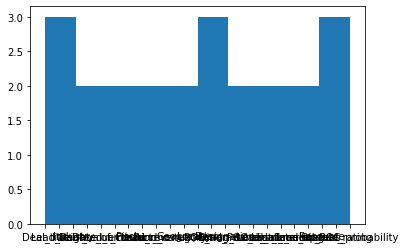

In [10]:
plt.hist(train)

In [133]:
import scipy.stats as stat
import pylab
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

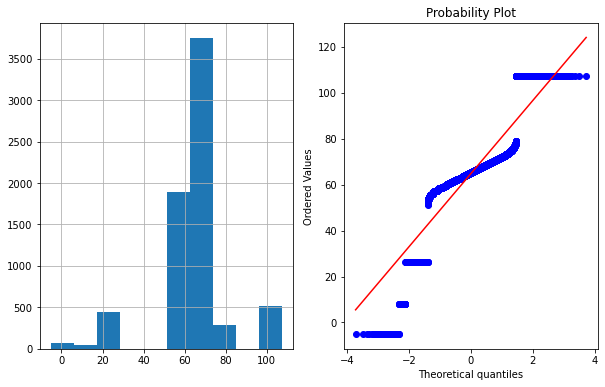

In [134]:
plot_data(train,'Success_probability')

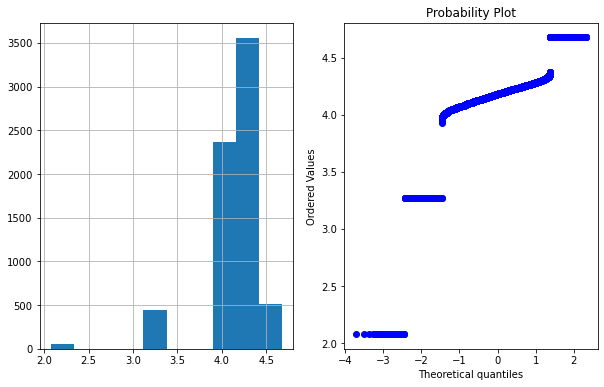

In [135]:
train['l']=np.log(train['Success_probability'])
plot_data(train,'l')


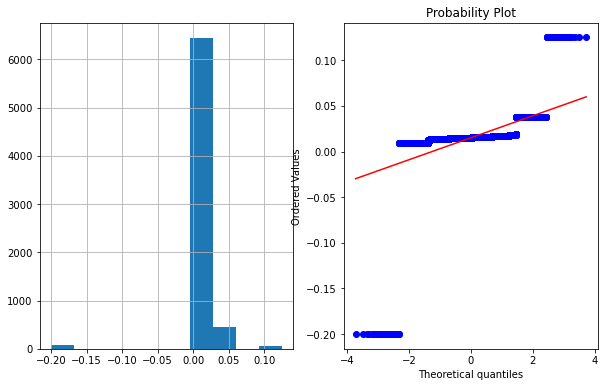

In [136]:
train['reciprocal']=1/train.Success_probability
plot_data(train,'reciprocal')

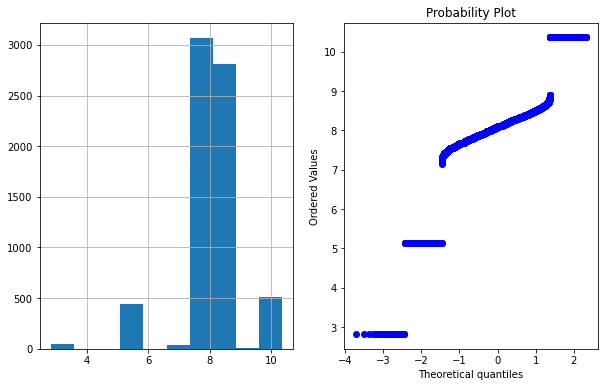

In [137]:
##### Square Root Transformation
train['sqaure']=train.Success_probability**(1/2)
plot_data(train,'sqaure')

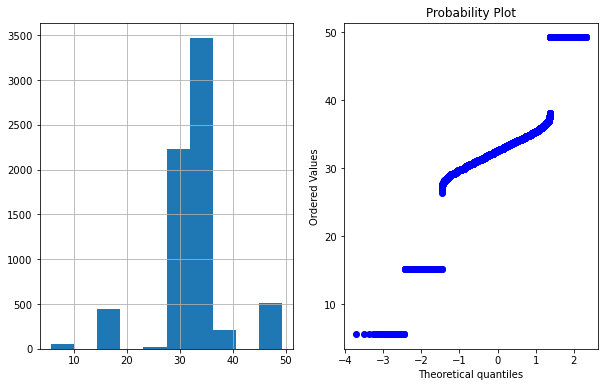

In [138]:
#### Exponential Transdormation
train['exponential']=train.Success_probability**(1/1.2)
plot_data(train,'exponential')

In [14]:
#train['Success_probability'] = np.where(train['Success_probability'] < 0, 'NaN', train['Success_probability']).astype(float)

In [15]:
#train['Success_probability']

0        73.60
1        58.90
2        68.80
3        64.50
4        62.40
         ...  
7002    107.34
7003     26.35
7004     70.60
7005       NaN
7006     68.70
Name: Success_probability, Length: 7007, dtype: float64

In [16]:
#train['Success_probability']=train['Success_probability'].fillna(train['Success_probability'].mean())

In [142]:
train['Boxcox'],parameters=stat.boxcox(train['Success_probability'])

In [144]:
print(parameters)

1.1149117503240311


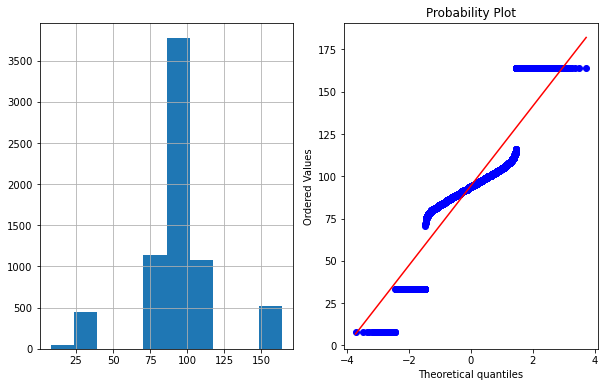

In [147]:
plot_data(train,'Boxcox')

In [51]:
y=train['Success_probability']
train.drop('Success_probability',axis=1,inplace=True)

In [52]:
df=pd.concat([train,test])

In [53]:
df.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3.0
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5.0
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4.0
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1.0
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4.0


In [54]:
df.POC_name.value_counts()

pooja              93
jyoti              53
kavita             43
priyanka           41
neha               41
                   ..
Benjamin Levine     1
Karen Fleming       1
Samuel Newton       1
Fred Rosales        1
rubby               1
Name: POC_name, Length: 6633, dtype: int64

In [55]:
df.drop(['Deal_title','Lead_name','Contact_no','POC_name','Lead_POC_email'],axis=1,inplace=True)

In [56]:
df.head()

,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,Restaurants,320506$,2067263.7$,2020-03-29,Product_2,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3.0
1,Construction Services,39488$,240876.8$,2019-07-10,Product_2,500 Million - 1 Billion,Category 4,India,Ratlam,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5.0
2,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",SVP/General Counsel,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4.0
3,Real Estate,76774$,468321.4$,2021-01-30,Product_2,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1.0
4,Financial Services,483896$,NaN,2019-05-22,Product_2,50 - 100 Million,Category 3,India,Shimoga,Executive Vice President,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4.0


In [17]:
df.shape

(9100, 18)

In [24]:
df.isnull().sum()

Industry                 0
Deal_value               0
Weighted_amount          0
Date_of_creation         0
Pitch                    0
Lead_revenue             0
Fund_category            0
Geography                0
Location                 0
POC_name                 0
Designation              0
Hiring_candidate_role    0
Lead_source              0
Level_of_meeting         0
Last_lead_update         0
Internal_POC             0
Resource                 0
Internal_rating          0
dtype: int64

In [19]:
df['Industry']=df['Industry'].fillna(df['Industry'].mode()[0])
df['Location']=df['Location'].fillna(df['Location'].mode()[0])
df['Resource']=df['Resource'].fillna(df['Resource'].mode()[0])
df['Last_lead_update']=df['Last_lead_update'].fillna(df['Last_lead_update'].mode()[0])
df['Geography']=df['Geography'].fillna(df['Geography'].mode()[0])
#df['POC_name']=df['POC_name'].fillna(df['POC_name'].mode()[0])

In [20]:
df.Deal_value = df.Deal_value.str.replace('$', '')
df.Weighted_amount = df.Weighted_amount.str.replace('$', '')

In [21]:
df['Deal_value']=df.Deal_value.astype(float)
df['Weighted_amount']=df.Weighted_amount.astype(float)

In [22]:
df['Deal_value']=df['Deal_value'].fillna(df['Deal_value'].mean()).astype(int)
df['Weighted_amount']=df['Weighted_amount'].fillna(df['Weighted_amount'].mean()).astype(int)

In [25]:
df.head()

,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,Restaurants,320506,2067263,2020-03-29,Product_2,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",No,3.0
1,Construction Services,39488,240876,2019-07-10,Product_2,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5.0
2,Hospitals/Clinics,359392,2407926,2019-07-27,Product_1,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4.0
3,Real Estate,76774,468321,2021-01-30,Product_2,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1.0
4,Financial Services,483896,1566787,2019-05-22,Product_2,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4.0


In [26]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Industry']=enc.fit_transform(df['Industry'])
df['Pitch']=enc.fit_transform(df['Pitch'])
df['Fund_category']=enc.fit_transform(df['Fund_category'])
df['Geography']=enc.fit_transform(df['Geography'])
df['Location']=enc.fit_transform(df['Location'])
df['Designation']=enc.fit_transform(df['Designation'])
df['Lead_revenue']=enc.fit_transform(df['Lead_revenue'])
df['Hiring_candidate_role']=enc.fit_transform(df['Hiring_candidate_role'])
df['Lead_source']=enc.fit_transform(df['Lead_source'])
df['Level_of_meeting']=enc.fit_transform(df['Level_of_meeting'])
df['Last_lead_update']=enc.fit_transform(df['Last_lead_update'])
df['Internal_POC']=enc.fit_transform(df['Internal_POC'])
df['Resource']=enc.fit_transform(df['Resource'])
#df['POC_name']=enc.fit_transform(df['POC_name'])

In [27]:
import datetime as dt
new = df['Date_of_creation'].str.split("-", n = 2, expand = True) 
df['Day'] = new[0]
df['Month'] = new[1]
df['Year'] = new[2]
del new

In [28]:
df['Day']=enc.fit_transform(df['Day'])
df['Month']=enc.fit_transform(df['Month'])
df['Year']=enc.fit_transform(df['Year'])

In [29]:
df.drop('Date_of_creation',axis=1,inplace=True)
#df.drop(['Day','Month','Year'],axis=1,inplace=true)

In [30]:
train.shape,test.shape,df.shape

((7007, 22), (2093, 22), (9100, 20))

In [31]:
df_train=df.iloc[:7007,:]
df_test=df.iloc[7007:,:]

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(df_train,y,test_size=0.33,random_state=1)

In [33]:
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
#def rmsle(y_true, y_pred):
   # return max(0,100-np.sqrt(mean_squared_error(y_true, y_pred)))

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_cv=sc.transform(x_cv)

In [40]:
df_test=sc.transform(df_test)

In [38]:
x_train.shape, y_train.shape , df_test.shape

((4694, 19), (4694,), (2093, 19))

In [359]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_cv)
print(sqrt(mean_squared_error(y_cv,lr_pred)))

12.341788970024114


In [360]:
lr_test_pred=lr.predict(df_test)

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_cv)
print(sqrt(mean_squared_error(y_cv,rf_pred)))

17.726074950735732


In [36]:
rf_test_pred=rf.predict(df_test)

In [44]:
import lightgbm
from lightgbm import LGBMRegressor
lgb=LGBMRegressor()
lgb.fit(x_train,y_train)
lgb_pred=lgb.predict(x_cv)
print(sqrt(mean_squared_error(y_cv,lgb_pred)))

16.206277666269433


In [45]:
lgb_test_pred=lgb.predict(df_test)

In [37]:
Submission = pd.DataFrame()
Submission['Deal_title'] = t
Submission['Success_probability'] = rf_test_pred

In [38]:
Submission.head()

,Deal_title,Success_probability
0,TitleAD16O,58.4769
1,TitleOW6CR,62.2897
2,TitleVVJQ5,62.0041
3,TitleUS8NA,61.0546
4,Title5VGWW,59.5810


In [39]:
Submission.to_csv('rf.csv',index=False)